# Исследование и подготовка данных

1. Загрузка данных

In [2]:
import os
import pandas as pd

DATA_DIR = 'data'
DATA_EPI_R_PATH = f'{DATA_DIR}/epi_r.csv'

os.makedirs(DATA_DIR, exist_ok=True)

print(f"Загрузка данных из {DATA_EPI_R_PATH}...")
try:
    df = pd.read_csv(DATA_EPI_R_PATH)
except FileNotFoundError:
    print(f"Ошибка: Файл {DATA_EPI_R_PATH} не найден. Убедитесь, что он находится в той же директории, что и исследование.")
    raise

Загрузка данных из data/epi_r.csv...


2. Анализ данных

In [3]:
import seaborn as sns

# Настройки отображения Pandas и Seaborn
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

# --- 1. Обзор данных ---
print("\n--- 1. ОБЗОР ДАННЫХ ---")
print("\nПервые 5 строк:")
print(df.head())


--- 1. ОБЗОР ДАННЫХ ---

Первые 5 строк:
                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   30 da

In [4]:
print("\nТипы данных и информация о столбцах:")
df.info(verbose=True, show_counts=True) # verbose и show_counts дают больше деталей


Типы данных и информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 680 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    title                     20052 non-null  object 
 1    rating                    20052 non-null  float64
 2    calories                  15935 non-null  float64
 3    protein                   15890 non-null  float64
 4    fat                       15869 non-null  float64
 5    sodium                    15933 non-null  float64
 6    #cakeweek                 20052 non-null  float64
 7    #wasteless                20052 non-null  float64
 8    22-minute meals           20052 non-null  float64
 9    3-ingredient recipes      20052 non-null  float64
 10   30 days of groceries      20052 non-null  float64
 11   advance prep required     20052 non-null  float64
 12   alabama                   20052 non-null  float64
 13   alaska

In [5]:
# --- 2. Анализ целевой переменной (rating) ---
print("\n--- 2. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (rating) ---")
print("\nОписательная статистика для 'rating':")
print(df['rating'].describe())


--- 2. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (rating) ---

Описательная статистика для 'rating':
count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64


In [6]:
print("\nУникальные значения и их количество в 'rating':")
print(df['rating'].value_counts().sort_index())


Уникальные значения и их количество в 'rating':
rating
0.000    1836
1.250     164
1.875     124
2.500     532
3.125    1489
3.750    5169
4.375    8019
5.000    2719
Name: count, dtype: int64



Визуализация распределения 'rating':


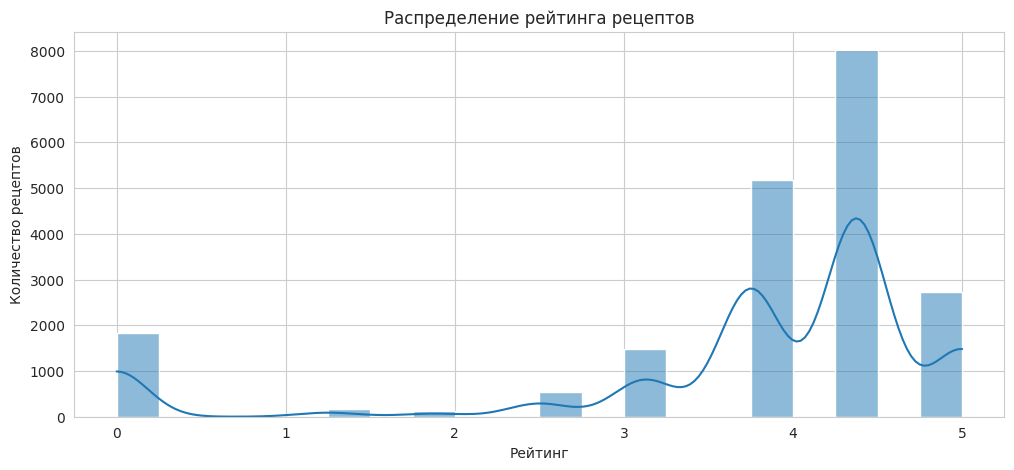

In [7]:
import matplotlib.pyplot as plt

print("\nВизуализация распределения 'rating':")
plt.figure(figsize=(12, 5))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Распределение рейтинга рецептов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество рецептов')
plt.show()

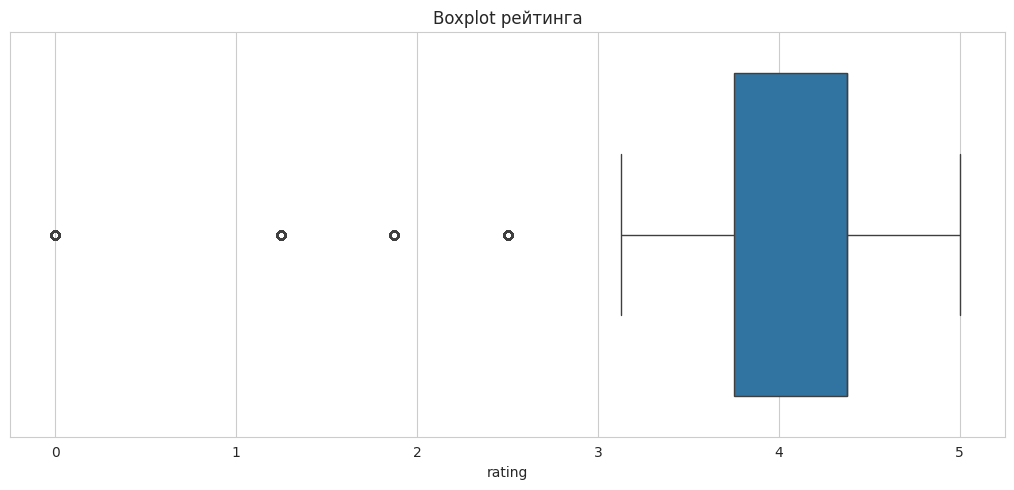

In [8]:
plt.figure(figsize=(10.25, 5))
sns.boxplot(x=df['rating'])
plt.title('Boxplot рейтинга')
plt.tight_layout()
plt.show()

In [9]:
rating_zero_count = (df['rating'] == 0).sum()
print(f"\nКоличество рецептов с рейтингом 0: {rating_zero_count} ({(rating_zero_count / len(df) * 100):.2f}%)")
# Возможно, рейтинг 0 означает "не оценено" или ошибку. Это требует внимания.


Количество рецептов с рейтингом 0: 1836 (9.16%)


In [10]:
# --- 3. Анализ признаков (Предполагаемые ингредиенты и другие столбцы) ---
print("\n--- 3. АНАЛИЗ ПРИЗНАКОВ ---")
all_columns = df.columns.tolist()
print(f"Всего столбцов: {len(all_columns)}")


--- 3. АНАЛИЗ ПРИЗНАКОВ ---
Всего столбцов: 680


In [11]:
# --- 4. Анализ пропусков ---
print("\n--- 4. АНАЛИЗ ПРОПУСКОВ ---")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'count': missing_values, 'percent': missing_percent})
missing_summary = missing_summary[missing_summary['count'] > 0].sort_values('percent', ascending=False)

print("\nСтолбцы с пропущенными значениями:")
if missing_summary.empty:
    print("Пропущенных значений не найдено.")
else:
    print(missing_summary)


--- 4. АНАЛИЗ ПРОПУСКОВ ---

Столбцы с пропущенными значениями:
          count    percent
fat        4183  20.860762
protein    4162  20.756034
sodium     4119  20.541592
calories   4117  20.531618


In [12]:
# --- 5. Анализ дубликатов ---
print("\n--- 5. АНАЛИЗ ДУБЛИКАТОВ ---")
total_duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {total_duplicates}")

# Часто дубликаты могут быть по названию рецепта
title_duplicates = df.duplicated(subset=['title']).sum()
print(f"Количество дубликатов по столбцу 'title': {title_duplicates}")
if title_duplicates > 0:
    print("Пример дублирующихся названий:")
    print(df[df.duplicated(subset=['title'], keep=False)].sort_values('title').head())



--- 5. АНАЛИЗ ДУБЛИКАТОВ ---
Количество полных дубликатов строк: 1801
Количество дубликатов по столбцу 'title': 2316
Пример дублирующихся названий:
                                             title  rating  calories  protein  \
17331                           4-3-2-1 Spice Rub    4.375      16.0      0.0   
20032                           4-3-2-1 Spice Rub    4.375      16.0      0.0   
5352   Acini di Pepe Pasta with Garlic and Olives    4.375     209.0      5.0   
96     Acini di Pepe Pasta with Garlic and Olives    4.375     209.0      5.0   
16147             Adobo-Glazed Mini Turkey Loaves    4.375       NaN      NaN   

       fat  sodium  #cakeweek  #wasteless  22-minute meals  \
17331  0.0  2292.0        0.0         0.0              0.0   
20032  0.0  2292.0        0.0         0.0              0.0   
5352   8.0    77.0        0.0         0.0              0.0   
96     8.0    77.0        0.0         0.0              0.0   
16147  NaN     NaN        0.0         0.0             

2. Обработка данных

In [13]:
print(f"Размер до удаления полных дубликатов: {df.shape}")
df = df.drop_duplicates()
print(f"Размер после удаления полных дубликатов: {df.shape}")

Размер до удаления полных дубликатов: (20052, 680)
Размер после удаления полных дубликатов: (18251, 680)


In [14]:
print(f"Размер до удаления дубликатов по title: {df.shape}")
df = df.drop_duplicates(subset=['title'], keep='first')
print(f"Размер после удаления дубликатов по title: {df.shape}")

Размер до удаления дубликатов по title: (18251, 680)
Размер после удаления дубликатов по title: (17736, 680)


In [15]:
print(f"Размер до удаления рейтинга 0: {df.shape}")
df = df[df['rating'] > 0].copy()
print(f"Размер после удаления рейтинга 0: {df.shape}")
print("\nПроверка оставшихся значений рейтинга:")
print(df['rating'].value_counts().sort_index())

Размер до удаления рейтинга 0: (17736, 680)
Размер после удаления рейтинга 0: (16168, 680)

Проверка оставшихся значений рейтинга:
rating
1.250     139
1.875     104
2.500     473
3.125    1323
3.750    4645
4.375    7180
5.000    2304
Name: count, dtype: int64


Практика воспользоваться предложенным API в контексте задания, привела к большому колличеству неверных ответов для определения что является, а что нет индигриентом. Поэтому список подготовлен в ручную.

In [16]:
import json

INGRIDIENTS_FILE = f'{DATA_DIR}/ingredients.json'

def ingridients():
  try:
    with open(INGRIDIENTS_FILE, 'r') as f:
      result = []
      data = json.load(f)
      for key, value in data.items():
        if value:
          result.append(key)
      return result
  except FileNotFoundError:
    return {}
  
ingridients_list = ingridients()
  
print(f"Размер до отсева по ингридиетам: {df.shape}")
df = df[['rating'] + ingridients_list]
print(f"Размер после отсева по ингридиетам: {df.shape}")

Размер до отсева по ингридиетам: (16168, 680)
Размер после отсева по ингридиетам: (16168, 343)


3. Прогнозирование - Регрессия (Анализ числового рейтинга)

In [17]:
# 1. Определение признаков (X) и целевой переменной (y)
X = df[ingridients_list]
y = df['rating']

print(f"\nОпределение признаков (X), размерность: {X.shape}")
print(f"Определение цели (y), размерность: {y.shape}")


Определение признаков (X), размерность: (16168, 342)
Определение цели (y), размерность: (16168,)


In [18]:
from sklearn.model_selection import train_test_split

# Константа для воспроизводимости
RANDOM_STATE = 42
TEST_SIZE = 0.25

stratify_raiting = y.apply(lambda r: 'bad' if r < 2 else ('so-so' if r < 4 else 'great'))
print("\nРаспределение категорий для стратификации:")
print(stratify_raiting.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=stratify_raiting
)

# Проверка размеров полученных выборок
print("\nРазмеры выборок:")
print(f"  Обучающая выборка X_train: {X_train.shape}")
print(f"  Тестовая выборка X_test:  {X_test.shape}")
print(f"  Обучающая выборка y_train: {y_train.shape}")
print(f"  Тестовая выборка y_test:  {y_test.shape}")

# Проверим распределение целевой переменной в train и test (среднее)
print("\nСредний рейтинг:")
print(f"  В обучающей выборке (y_train): {y_train.mean():.4f}")
print(f"  В тестовой выборке (y_test):  {y_test.mean():.4f}")
print(f"  В исходной выборке (y):      {y.mean():.4f}")


Распределение категорий для стратификации:
rating
great    0.586591
so-so    0.398380
bad      0.015030
Name: proportion, dtype: float64

Размеры выборок:
  Обучающая выборка X_train: (12126, 342)
  Тестовая выборка X_test:  (4042, 342)
  Обучающая выборка y_train: (12126,)
  Тестовая выборка y_test:  (4042,)

Средний рейтинг:
  В обучающей выборке (y_train): 4.0837
  В тестовой выборке (y_test):  4.0865
  В исходной выборке (y):      4.0844


### Метрики оценки регрессии:

Как понять, насколько хорошо работает регрессионная модель? Нам нужны метрики, которые измеряют "расстояние" или "ошибку" между истинными значениями (y_test) и предсказанными моделью (y_pred).

1. RMSE (Root Mean Squared Error / Корень из среднеквадратичной ошибки):
  * Что это: Корень из среднего значения квадратов разностей между предсказанными и истинными значениями.
  * Формула: sqrt(mean((y_true - y_pred)^2))
  * Интерпретация: Показывает "типичное" или "среднеквадратичное" отклонение предсказаний от реальных значений. Измеряется в тех же единицах, что и целевая переменная (в нашем случае — в баллах рейтинга). Сильно штрафует за большие ошибки (из-за возведения в квадрат). Чем ниже RMSE, тем лучше. Это основная метрика, указанная в задании.
  * В Scikit-learn: mean_squared_error(y_true, y_pred, squared=False)
2. MAE (Mean Absolute Error / Средняя абсолютная ошибка):
  * Что это: Среднее значение абсолютных разностей между предсказанными и истинными значениями.
  * Формула: mean(|y_true - y_pred|)
  * Интерпретация: Показывает "среднее" абсолютное отклонение предсказаний. Также измеряется в единицах целевой переменной. Менее чувствительна к выбросам, чем RMSE. Чем ниже MAE, тем лучше. Хорошо использовать в дополнение к RMSE.
  * В Scikit-learn: mean_absolute_error(y_true, y_pred)
3. R² (R-squared / Коэффициент детерминации):
  * Что это: Доля дисперсии (вариативности) целевой переменной, которая объясняется моделью.
  * Интерпретация: Показывает, насколько хорошо модель "подходит" к данным по сравнению с простой моделью, предсказывающей среднее значение.
    * R² = 1: Идеальная модель, объясняет всю вариативность.
    * R² = 0: Модель работает не лучше, чем простое предсказание среднего (именно такой результат мы ожидаем от DummyRegressor(strategy='mean')).
    * R² < 0: Модель работает хуже, чем предсказание среднего.
  * Чем ближе R² к 1, тем лучше.
  * В Scikit-learn: r2_score(y_true, y_pred) или метод .score() у обученной модели регрессии.


In [20]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("--- Оценка DummyRegressor (Baseline) ---")

# 1. Стратегия: Предсказание среднего значения y_train
print("\n1. Стратегия: предсказание среднего")
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean.fit(X_train, y_train) # Модель запоминает среднее y_train, X_train игнорируется
y_pred_dummy_mean = dummy_mean.predict(X_test) # Предсказывает одно и то же среднее для всех в X_test

# Оценка DummyRegressor (mean)
rmse_dummy_mean = np.sqrt(mean_squared_error(y_test, y_pred_dummy_mean))
mae_dummy_mean = mean_absolute_error(y_test, y_pred_dummy_mean)
r2_dummy_mean = r2_score(y_test, y_pred_dummy_mean) # Ожидаем значение около 0

print(f"   Предсказанное значение (среднее y_train): {y_pred_dummy_mean[0]:.4f}") # Все предсказания одинаковы
print(f"   RMSE: {rmse_dummy_mean:.4f}")
print(f"   MAE:  {mae_dummy_mean:.4f}")
print(f"   R²:   {r2_dummy_mean:.4f}")

# 2. Стратегия: Предсказание медианы y_train
print("\n2. Стратегия: предсказание медианы")
dummy_median = DummyRegressor(strategy="median")
dummy_median.fit(X_train, y_train) # Модель запоминает медиану y_train
y_pred_dummy_median = dummy_median.predict(X_test) # Предсказывает медиану для всех

# Оценка DummyRegressor (median)
rmse_dummy_median = np.sqrt(mean_squared_error(y_test, y_pred_dummy_median))
mae_dummy_median = mean_absolute_error(y_test, y_pred_dummy_median)
r2_dummy_median = r2_score(y_test, y_pred_dummy_median) # Может отличаться от 0, если среднее и медиана не совпадают

print(f"   Предсказанное значение (медиана y_train): {y_pred_dummy_median[0]:.4f}")
print(f"   RMSE: {rmse_dummy_median:.4f}")
print(f"   MAE:  {mae_dummy_median:.4f}")
print(f"   R²:   {r2_dummy_median:.4f}")

print("\n--- Базовые метрики установлены ---")
print(f"Любая полезная регрессионная модель должна иметь RMSE < {min(rmse_dummy_mean, rmse_dummy_median):.4f}")
print(f"и R² > {max(r2_dummy_mean, r2_dummy_median):.4f}")

--- Оценка DummyRegressor (Baseline) ---

1. Стратегия: предсказание среднего
   Предсказанное значение (среднее y_train): 4.0837
   RMSE: 0.6659
   MAE:  0.5211
   R²:   -0.0000

2. Стратегия: предсказание медианы
   Предсказанное значение (медиана y_train): 4.3750
   RMSE: 0.7257
   MAE:  0.4707
   R²:   -0.1877

--- Базовые метрики установлены ---
Любая полезная регрессионная модель должна иметь RMSE < 0.6659
и R² > -0.0000


Проработка инных методов с целью сравнения с базовой моделью

In [36]:
import time

# --- Импорт моделей ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# --- Также нужны baseline метрики ---
baseline_rmse = min(rmse_dummy_mean, rmse_dummy_median)
baseline_r2 = max(r2_dummy_mean, r2_dummy_median)

# --- Словарь для хранения результатов ---
results = {}

# --- Список моделей для тестирования ---
# Добавляем 'alpha=1.0' для регуляризованных моделей, чтобы избежать предупреждений
# Увеличиваем max_iter для Lasso/ElasticNet, чтобы улучшить сходимость
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=RANDOM_STATE),
    "Lasso": Lasso(alpha=0.001, max_iter=5000, random_state=RANDOM_STATE), # Маленькая alpha для начала
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=5000, random_state=RANDOM_STATE), # Маленькая alpha
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1), # n_jobs=-1 использует все ядра CPU
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=RANDOM_STATE),
    "KNN": KNeighborsRegressor(n_neighbors=5, n_jobs=-1), # n_jobs=-1 ускорит поиск соседей
    "SVR": SVR(kernel='rbf') # SVR может быть ОЧЕНЬ медленным на больших данных
}

# --- Цикл обучения и оценки ---
for name, model in models.items():
    print(f"--- Обучение и оценка: {name} ---")
    start_time = time.time()

    # Обучение
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Предсказание
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    # Оценка
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Сохранение результатов
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'Train Time (s)': train_time, 'Predict Time (s)': predict_time}

    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  Время обучения: {train_time:.2f} сек")
    print(f"  Время предсказания: {predict_time:.2f} сек")
    # Сравнение с baseline (если baseline_rmse и baseline_r2 определены)
    try:
        if rmse < baseline_rmse:
            print(f"  Результат: ЛУЧШЕ baseline по RMSE ({rmse:.4f} < {baseline_rmse:.4f})")
        else:
            print(f"  Результат: ХУЖЕ baseline по RMSE ({rmse:.4f} >= {baseline_rmse:.4f})")
        if r2 > baseline_r2:
             print(f"  Результат: ЛУЧШЕ baseline по R² ({r2:.4f} > {baseline_r2:.4f})")
        else:
             print(f"  Результат: ХУЖЕ baseline по R² ({r2:.4f} <= {baseline_r2:.4f})")
    except NameError:
        print("  (Baseline метрики не определены для сравнения)")
    print("-" * 30)

# --- Вывод итоговой таблицы результатов ---
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='RMSE', ascending=True)

print("\n--- Сводная таблица результатов (на тестовой выборке) ---")
print(results_df)

--- Обучение и оценка: Linear Regression ---
  RMSE: 0.6674
  MAE:  0.5023
  R²:   -0.0043
  Время обучения: 0.20 сек
  Время предсказания: 0.01 сек
  Результат: ХУЖЕ baseline по RMSE (0.6674 >= 0.6659)
  Результат: ХУЖЕ baseline по R² (-0.0043 <= -0.0000)
------------------------------
--- Обучение и оценка: Ridge ---
  RMSE: 0.6636
  MAE:  0.5009
  R²:   0.0070
  Время обучения: 0.10 сек
  Время предсказания: 0.01 сек
  Результат: ЛУЧШЕ baseline по RMSE (0.6636 < 0.6659)
  Результат: ЛУЧШЕ baseline по R² (0.0070 > -0.0000)
------------------------------
--- Обучение и оценка: Lasso ---
  RMSE: 0.6595
  MAE:  0.5091
  R²:   0.0191
  Время обучения: 0.15 сек
  Время предсказания: 0.01 сек
  Результат: ЛУЧШЕ baseline по RMSE (0.6595 < 0.6659)
  Результат: ЛУЧШЕ baseline по R² (0.0191 > -0.0000)
------------------------------
--- Обучение и оценка: ElasticNet ---
  RMSE: 0.6582
  MAE:  0.5042
  R²:   0.0231
  Время обучения: 0.11 сек
  Время предсказания: 0.01 сек
  Результат: ЛУЧШЕ base

Если проанализировать модели которые мы запустили на дефолтных значения. Мы заметим, что приоритетные модели для дальнейшей обработки ElasticNet, Lasso, Gradient Boosting.

In [ ]:
from sklearn.model_selection import cross_val_score

print("--- Кросс-валидация для топ-4 моделей (на обучающей выборке) ---")

# --- Модели для кросс-валидации ---
models_for_cv = dict(filter(lambda item: item[0] in results_df.index[:4].tolist(), models.items()))

# --- Словарь для хранения результатов CV ---
cv_results = {}

# --- Параметры CV ---
cv_folds = 5 # 5-кратная кросс-валидация
scoring_metric = 'neg_mean_squared_error'

# --- Цикл кросс-валидации ---
for name, model in models_for_cv.items():
    print(f"\nЗапуск CV для: {name}")
    start_time = time.time()

    # Выполнение кросс-валидации
    # cross_val_score возвращает массив оценок (отрицательный MSE для каждого фолда)
    neg_mse_scores = cross_val_score(model, X_train, y_train,
                                     scoring=scoring_metric,
                                     cv=cv_folds,
                                     n_jobs=-1) # Используем все ядра CPU

    # Преобразование отрицательного MSE в RMSE
    rmse_scores = np.sqrt(-neg_mse_scores)

    cv_time = time.time() - start_time

    # Расчет среднего и стандартного отклонения RMSE
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    # Сохранение результатов
    cv_results[name] = {'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse, 'CV Time (s)': cv_time}

    print(f"  Завершено за: {cv_time:.2f} сек")
    print(f"  RMSE по фолдам: {np.round(rmse_scores, 4)}")
    print(f"  Средний RMSE: {mean_rmse:.4f}")
    print(f"  Стандартное отклонение RMSE: {std_rmse:.4f}")
    print("-" * 30)

# --- Вывод итоговой таблицы результатов CV ---
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df = cv_results_df.sort_values(by='Mean RMSE', ascending=True)

print("\n--- Сводная таблица результатов кросс-валидации (на обучающей выборке) ---")
print(cv_results_df)

--- Кросс-валидация для топ-4 моделей (на обучающей выборке) ---

Запуск CV для: Ridge
  Завершено за: 1.67 сек
  RMSE по фолдам: [0.654  0.6519 0.6725 0.6525 0.6588]
  Средний RMSE: 0.6579
  Стандартное отклонение RMSE: 0.0077
------------------------------

Запуск CV для: Lasso
  Завершено за: 0.96 сек
  RMSE по фолдам: [0.647  0.6457 0.6661 0.6531 0.6606]
  Средний RMSE: 0.6545
  Стандартное отклонение RMSE: 0.0078
------------------------------

Запуск CV для: ElasticNet
  Завершено за: 0.96 сек
  RMSE по фолдам: [0.6467 0.6448 0.6661 0.6514 0.6581]
  Средний RMSE: 0.6534
  Стандартное отклонение RMSE: 0.0078
------------------------------

Запуск CV для: Gradient Boosting
  Завершено за: 2.87 сек
  RMSE по фолдам: [0.6476 0.6457 0.6678 0.6547 0.6613]
  Средний RMSE: 0.6554
  Стандартное отклонение RMSE: 0.0083
------------------------------

--- Сводная таблица результатов кросс-валидации (на обучающей выборке) ---
                   Mean RMSE  Std RMSE  CV Time (s)
ElasticNet    

In [53]:
from sklearn.model_selection import GridSearchCV

print("--- Подбор гиперпараметров для ElasticNet с помощью GridSearchCV ---")

# Определяем сетку параметров для ElasticNet
param_grid_elastic = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0], # Разные порядки силы регуляризации
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0] # Разный баланс L1/L2 (1.0 = Lasso)
    # 'max_iter': [5000] # Можно оставить значение по умолчанию или увеличить, если не сходится
}

# Инициализируем GridSearchCV
# n_jobs=-1 использует все ядра, verbose=2 показывает прогресс
grid_search_elastic = GridSearchCV(
    estimator=ElasticNet(random_state=RANDOM_STATE, max_iter=5000), # Увеличим max_iter на всякий случай
    param_grid=param_grid_elastic,
    scoring='neg_mean_squared_error', # Ищем минимум RMSE (максимум -RMSE)
    cv=5, # 5-кратная кросс-валидация
    n_jobs=-1,
    verbose=2
)

# Запускаем поиск
start_time = time.time()
print("Запуск GridSearchCV для ElasticNet...")
grid_search_elastic.fit(X_train, y_train)
search_time = time.time() - start_time
print(f"Поиск для ElasticNet завершен за: {search_time:.2f} сек")

# Выводим лучшие результаты
print(f"\nЛучшие параметры для ElasticNet: {grid_search_elastic.best_params_}")
best_rmse_elastic_cv = np.sqrt(-grid_search_elastic.best_score_)
print(f"Лучший средний RMSE по CV для ElasticNet: {best_rmse_elastic_cv:.4f}")

# Сохраняем лучшую модель
best_elastic_model = grid_search_elastic.best_estimator_

--- Подбор гиперпараметров для ElasticNet с помощью GridSearchCV ---
Запуск GridSearchCV для ElasticNet...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=1.0; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=1.0; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=1.0; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=1.0; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=1.0; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.1s
[CV] END ............

In [55]:
print("\n--- Подбор гиперпараметров для Gradient Boosting с помощью GridSearchCV ---")

# Определяем сетку параметров для GradientBoostingRegressor
# Сетка может быть большой, начнем с умеренного варианта
param_grid_gb = {
    'n_estimators': [100, 200, 300], # Количество деревьев
    'learning_rate': [0.05, 0.1],   # Темп обучения
    'max_depth': [3, 5],             # Максимальная глубина
    'min_samples_leaf': [1, 3],        # Мин. образцов в листе
    'subsample': [0.8, 1.0]         # Можно добавить стохастичности
}

# Инициализируем GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Запускаем поиск
start_time = time.time()
print("Запуск GridSearchCV для Gradient Boosting...")
grid_search_gb.fit(X_train, y_train)
search_time = time.time() - start_time
print(f"Поиск для Gradient Boosting завершен за: {search_time:.2f} сек")

# Выводим лучшие результаты
print(f"\nЛучшие параметры для Gradient Boosting: {grid_search_gb.best_params_}")
best_rmse_gb_cv = np.sqrt(-grid_search_gb.best_score_)
print(f"Лучший средний RMSE по CV для Gradient Boosting: {best_rmse_gb_cv:.4f}")

# Сохраняем лучшую модель
best_gb_model = grid_search_gb.best_estimator_


--- Подбор гиперпараметров для Gradient Boosting с помощью GridSearchCV ---
Запуск GridSearchCV для Gradient Boosting...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=1.0; total time=   2.7s
[CV] END learning_

In [57]:
print("\n--- Подбор гиперпараметров завершен ---")

# --- Сравнение лучших результатов CV ---
print("\nСравнение лучших моделей по среднему RMSE на кросс-валидации:")
print(f"  ElasticNet: {best_rmse_elastic_cv:.4f}")
print(f"  Gradient Boosting: {best_rmse_gb_cv:.4f}")

# Выбираем финальную лучшую модель
if best_rmse_elastic_cv < best_rmse_gb_cv:
    final_best_model = best_elastic_model
    final_best_model_name = "ElasticNet"
    final_best_cv_rmse = best_rmse_elastic_cv
    print(f"\nФинальная лучшая модель по CV: ElasticNet с RMSE={final_best_cv_rmse:.4f}")
else:
    final_best_model = best_gb_model
    final_best_model_name = "Gradient Boosting"
    final_best_cv_rmse = best_rmse_gb_cv
    print(f"\nФинальная лучшая модель по CV: Gradient Boosting с RMSE={final_best_cv_rmse:.4f}")

# --- Финальная оценка лучшей модели на тестовой выборке ---
print(f"\n--- Финальная оценка модели '{final_best_model_name}' на тестовой выборке (X_test, y_test) ---")
y_pred_final = final_best_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print(f"  Итоговый RMSE на тесте: {final_rmse:.4f}")
print(f"  Итоговый MAE на тесте:  {final_mae:.4f}")
print(f"  Итоговый R² на тесте:   {final_r2:.4f}")

# Не забудьте сравнить final_rmse с baseline_rmse!
try:
    if final_rmse < baseline_rmse:
        print(f"\nУспех! Итоговый RMSE ({final_rmse:.4f}) лучше baseline ({baseline_rmse:.4f}).")
    else:
        print(f"\nВнимание! Итоговый RMSE ({final_rmse:.4f}) не лучше baseline ({baseline_rmse:.4f}).")
except NameError:
    print("\n(Baseline RMSE не определен для сравнения)")


--- Подбор гиперпараметров завершен ---

Сравнение лучших моделей по среднему RMSE на кросс-валидации:
  ElasticNet: 0.6535
  Gradient Boosting: 0.6546

Финальная лучшая модель по CV: ElasticNet с RMSE=0.6535

--- Финальная оценка модели 'ElasticNet' на тестовой выборке (X_test, y_test) ---
  Итоговый RMSE на тесте: 0.6582
  Итоговый MAE на тесте:  0.5042
  Итоговый R² на тесте:   0.0231

Успех! Итоговый RMSE (0.6582) лучше baseline (0.6659).


4. Прогнозирование - Классификация (Анализ классов рейтинга)

In [ ]:
# Преобразование цели 1: Целые классы (0-5)
y_int = y.round().astype(int)

# Новое разделение данных со стратификацией по целым классам
X_train_cls, X_test_cls, y_train_int, y_test_int = train_test_split(
    X, y_int,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y_int # Важно для сохранения пропорций классов
)

print(f"Распределение классов в y_train_int:\n{y_train_int.value_counts(normalize=True)}")

Базовая классификация

In [ ]:
from sklearn.dummy import DummyClassifier

# Классификация по целым числам (0-5) - оценка по Accuracy
print("\nКлассификация по целым классам (0-5) - Метрика: Accuracy")

dummy_clf_int = DummyClassifier(strategy="most_frequent")
dummy_clf_int.fit(X_train_cls, y_train_int)
acc_dummy_int = dummy_clf_int.score(X_test_cls, y_test_int)
print(f"Наивный классификатор (most frequent): Accuracy = {acc_dummy_int:.4f}")


Пример для Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='constant', fill_value=0)

log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=2000, solver='liblinear', class_weight='balanced')

pipeline_lg = Pipeline([
    ('imputer', imputer),
    ('classifier', log_reg)
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(pipeline_lg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_cls, y_train_int)

print(f"Лучшая Accuracy на кросс-валидации: {grid_search.best_score_:.4f}")

best_log_reg = grid_search.best_estimator_

acc_log_reg_int = best_log_reg.score(X_test_cls, y_test_int)
print(f"Logistic Regression: Accuracy = {acc_log_reg_int:.4f}")

Преобразование цели: Классы 'bad', 'so-so', 'great'

In [ ]:
from sklearn.preprocessing import LabelEncoder

def rating_to_category(rating):
    rating_int = round(rating)
    if rating_int <= 1: return 'bad'
    elif rating_int <= 3: return 'so-so'
    else: return 'great'

y_cat = y.apply(rating_to_category)

# Кодирование категорий в числа (0, 1, 2) для некоторых моделей sklearn
label_encoder = LabelEncoder()
y_cat_encoded = label_encoder.fit_transform(y_cat)
class_names = label_encoder.classes_
print(f"\nКлассы: {class_names}") # ['bad', 'great', 'so-so']

Новое разделение данных со стратификацией по категориям

In [ ]:
X_train_cls, X_test_cls, y_train_cat, y_test_cat = train_test_split(
    X, y_cat_encoded,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y_cat_encoded # Стратификация по закодированным категориям
)
print(f"Распределение классов в y_train_cat:\n{pd.Series(y_train_cat).map(dict(enumerate(class_names))).value_counts(normalize=True)}")

Классификация по 3 классам - оценка по Accuracy

In [ ]:
print("\nКлассификация по 3 классам - Метрика: Accuracy")
dummy_clf_cat = DummyClassifier(strategy="most_frequent")
dummy_clf_cat.fit(X_train_cls, y_train_cat)
acc_dummy_cat = dummy_clf_cat.score(X_test_cls, y_test_cat)
print(f"Dummy классификатор (most frequent): Accuracy = {acc_dummy_cat:.4f}")

Модели классификации (3 класса) с подбором параметров по F1-weighted

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score

print("Точность (Accuracy) не всегда лучшая метрика при дисбалансе или разной стоимости ошибок.")

# ### Модели классификации (3 класса) с подбором параметров по F1-weighted
models_clf = {
    "Random Forest Classifier": RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced', n_jobs=-1),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=RANDOM_STATE) # GB не имеет class_weight напрямую
}

# Параметры для подбора (упрощенные для скорости)
param_grid_logreg = {'classifier__C': [0.1, 1.0, 10.0]}

results_clf_f1 = {}
best_models_clf = {}

# -- Logistic Regression --
print("\nПодбор гиперпараметров для Logistic Regression (F1-weighted)...")
grid_logreg = GridSearchCV(pipeline_lg, param_grid_logreg, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_logreg.fit(X_train_cls, y_train_cat)
best_models_clf["Logistic Regression"] = grid_logreg.best_estimator_
y_pred_logreg_cat = best_models_clf["Logistic Regression"].predict(X_test_cls)
f1_logreg = f1_score(y_test_cat, y_pred_logreg_cat, average='weighted')
results_clf_f1["Logistic Regression"] = f1_logreg
print(f"Logistic Regression: Лучшие параметры: {grid_logreg.best_params_}, Тест F1-weighted = {f1_logreg:.4f}")

Random Forest Classifier

In [ ]:
# -- Random Forest Classifier --
param_grid_rf_clf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

print("\nПодбор гиперпараметров для Random Forest Classifier (F1-weighted)...")
grid_rf_clf = GridSearchCV(models_clf["Random Forest Classifier"], param_grid_rf_clf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_rf_clf.fit(X_train_cls, y_train_cat)
best_models_clf["Random Forest Classifier"] = grid_rf_clf.best_estimator_
y_pred_rf_clf_cat = best_models_clf["Random Forest Classifier"].predict(X_test_cls)
f1_rf_clf = f1_score(y_test_cat, y_pred_rf_clf_cat, average='weighted')
results_clf_f1["Random Forest Classifier"] = f1_rf_clf
print(f"Random Forest Classifier: Лучшие параметры: {grid_rf_clf.best_params_}, Тест F1-weighted = {f1_rf_clf:.4f}")
# print(classification_report(y_test_cat, y_pred_rf_clf_cat, target_names=class_names))

Gradient Boosting Classifier

In [ ]:
# -- Gradient Boosting Classifier --
imputer = SimpleImputer(strategy='constant', fill_value=0)

pipeline_gb = Pipeline([
    ('imputer', imputer),
    ('classifier', models_clf["Gradient Boosting Classifier"])
])

param_grid_gb_clf = {
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

print("\nПодбор гиперпараметров для Gradient Boosting Classifier (F1-weighted)...")
grid_gb_clf = GridSearchCV(pipeline_gb, param_grid_gb_clf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_gb_clf.fit(X_train_cls, y_train_cat)
best_models_clf["Gradient Boosting Classifier"] = grid_gb_clf.best_estimator_
y_pred_gb_clf_cat = best_models_clf["Gradient Boosting Classifier"].predict(X_test_cls)
f1_gb_clf = f1_score(y_test_cat, y_pred_gb_clf_cat, average='weighted')
results_clf_f1["Gradient Boosting Classifier"] = f1_gb_clf
print(f"Gradient Boosting Classifier: Лучшие параметры: {grid_gb_clf.best_params_}, Тест F1-weighted = {f1_gb_clf:.4f}")
# print(classification_report(y_test_cat, y_pred_gb_clf_cat, target_names=class_names))

5. Выбор и сохранение лучшей модели

In [ ]:
print("\n--- Этап 5: Выбор и сохранение модели ---")

# Выбираем модель с лучшим F1-weighted на тесте
best_model_name = max(results_clf_f1, key=results_clf_f1.get)
best_model = best_models_clf[best_model_name]
best_f1_score = results_clf_f1[best_model_name]

print(f"\nЛучшая модель классификации: {best_model_name} с F1-weighted = {best_f1_score:.4f}")

Переобучение на всей выборке

In [ ]:
# Переобучаем лучшую модель на всех данных, использованных для обучения классификаторов ('bad', 'so-so', 'great')
print(f"Переобучение {best_model_name} на всех данных для классификации...")
final_model = best_model
final_model.fit(X, y_cat_encoded)
print("Переобучение завершено.")

# Добавляем LabelEncoder в модель или сохраняем отдельно
# Можно создать пайплайн или сохранить LabelEncoder
final_model.classes_ = class_names

Сохранение модели и признаков

In [ ]:
import joblib

MODEL_PATH = os.path.join(DATA_DIR, 'best_classifier_model.joblib')
FEATURES_PATH = os.path.join(DATA_DIR, 'ingredient_features.joblib')

# Сохраняем обученную модель
print(f"Сохранение модели в {MODEL_PATH}...")
joblib.dump(final_model, MODEL_PATH)
print("Модель сохранена.")

# Сохраняем список признаков (названия колонок-ингредиентов)
ingredient_features = X.columns.tolist()
print(f"Сохранение списка признаков ({len(ingredient_features)} шт.) в {FEATURES_PATH}...")
joblib.dump(ingredient_features, FEATURES_PATH)
print("Список признаков сохранен.")

6. Сбор данных о пищевой ценности (Nutrition Facts)

In [ ]:
NUTRITION_DV_CSV_PATH = os.path.join(DATA_DIR, 'nutrition_facts_dv.csv')
RECIPE_URLS_CSV_PATH = os.path.join(DATA_DIR, 'recipe_urls.csv')


# ## Этап 6: Сбор данных о пищевой ценности (Nutrition Facts)

unique_ingredients = ingredient_features
print(f"Найдено {len(unique_ingredients)} уникальных ингредиентов для запроса к API.")

# Определяем целевые нутриенты (примерный маппинг, может требовать уточнения по ID из API)
# Ключ - наше название, Значение - ID нутриента в FDC API (найти в документации или по ответам API)
target_nutrient_ids = {
    'Protein': 203, # Protein
    'Total lipid (fat)': 204, # Total lipid (fat)
    'Carbohydrate, by difference': 205, # Carbohydrate, by difference
    'Energy': 208, # Energy (можно использовать для калорий, если нужно)
    'Sugars, total including NLEA': 269, # Sugars, total including NLEA
    'Fiber, total dietary': 291, # Fiber, total dietary
    'Calcium, Ca': 301, # Calcium, Ca
    'Iron, Fe': 303, # Iron, Fe
    'Magnesium, Mg': 304, # Magnesium, Mg
    'Phosphorus, P': 305, # Phosphorus, P (не было в списке, но часто важен)
    'Potassium, K': 306, # Potassium, K
    'Sodium, Na': 307, # Sodium, Na
    'Zinc, Zn': 309, # Zinc, Zn
    'Copper, Cu': 312, # Copper, Cu
    'Manganese, Mn': 315, # Manganese, Mn (не было в списке)
    'Selenium, Se': 317, # Selenium, Se
    'Vitamin C, total ascorbic acid': 401, # Vitamin C, total ascorbic acid
    'Thiamin': 404, # Thiamin (B1)
    'Riboflavin': 405, # Riboflavin (B2)
    'Niacin': 406, # Niacin (B3)
    'Vitamin B-6': 415, # Vitamin B-6
    'Folate, total': 417, # Folate, total
    'Vitamin B-12': 418, # Vitamin B-12
    'Vitamin A, RAE': 320, # Vitamin A, RAE (Retinol Activity Equivalents)
    'Vitamin E (alpha-tocopherol)': 323, # Vitamin E (alpha-tocopherol)
    'Vitamin D (D2 + D3)': 328, # Vitamin D (D2 + D3), International Units
    'Vitamin K (phylloquinone)': 430, # Vitamin K (phylloquinone)
    # Закомментированные - из исходного README, но могут не быть напрямую в FDC или иметь другие ID/названия
    # 'Chromium, Cr': - ID не стандартный, может отсутствовать
    # 'Iodine, I': - ID не стандартный, может отсутствовать
}
target_nutrient_ids_reverse_map = {v: k for k, v in target_nutrient_ids.items()}

def search_fdc_id(ingredient_name, api_key):
    """Ищет FDC ID для ингредиента."""
    base_url = "https://api.nal.usda.gov/fdc/v1/foods/search"
    params = {
        'query': ingredient_name,
        'api_key': api_key,
        'pageSize': 1, # Берем только первый результат
        'dataType': 'Branded,Foundation,SR Legacy' # Ищем в разных типах данных
    }
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status() # Проверка на HTTP ошибки
        data = response.json()
        if data['foods'] and len(data['foods']) > 0:
            return data['foods'][0]['fdcId']
        else:
            print(f"  Предупреждение: FDC ID не найден для '{ingredient_name}'")
            return None
    except requests.exceptions.RequestException as e:
        print(f"  Ошибка API при поиске '{ingredient_name}': {e}")
        return None
    except Exception as e:
        print(f"  Неожиданная ошибка при поиске '{ingredient_name}': {e}")
        return None

def get_nutrition_details(fdc_id, api_key, target_ids_map):
    """Получает детали по нутриентам для FDC ID."""
    base_url = f"https://api.nal.usda.gov/fdc/v1/food/{fdc_id}"
    params = {'api_key': api_key}
    nutrients_found = {}
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        # Ищем нутриенты в ответе API
        for nutrient in data.get('foodNutrients', []):
            nutrient_id = nutrient.get('nutrient', {}).get('id')
            if nutrient_id in target_ids_map:
                nutrient_name = target_ids_map[nutrient_id]
                nutrients_found[nutrient_name] = {
                    'value': nutrient.get('amount', 0),
                    'unit': nutrient.get('nutrient', {}).get('unitName', '').lower()
                }
        if not nutrients_found:
                print(f"  Предупреждение: Целевые нутриенты не найдены для FDC ID {fdc_id}")
        return nutrients_found
    except requests.exceptions.RequestException as e:
        print(f"  Ошибка API при получении деталей для FDC ID {fdc_id}: {e}")
        return None
    except Exception as e:
        print(f"  Неожиданная ошибка при получении деталей для FDC ID {fdc_id}: {e}")
        return None

# --- Цикл сбора данных ---
all_nutrition_data = {}
processed_count = 0
total_ingredients = len(unique_ingredients)

print("\nНачинаем сбор данных о питании (может занять много времени)...")
for ingredient in unique_ingredients:
    processed_count += 1
    print(f"Обработка: {ingredient} ({processed_count}/{total_ingredients})")

    # Проверяем, есть ли уже данные (на случай перезапуска)
    if ingredient in all_nutrition_data:
        print("  Данные уже есть, пропускаем.")
        continue

    fdc_id = search_fdc_id(ingredient, USDA_API_KEY)
    if fdc_id:
        details = get_nutrition_details(fdc_id, USDA_API_KEY, target_nutrient_ids_reverse_map)
        if details:
            all_nutrition_data[ingredient] = details
        else:
            all_nutrition_data[ingredient] = {} # Запись, что не найдено
    else:
            all_nutrition_data[ingredient] = {} # Запись, что ID не найден

    time.sleep(1.1) # Пауза между запросами, чтобы не превысить лимит API

print("\nСбор данных о питании завершен.")
# Посмотрим пример для одного ингредиента
if 'milk' in all_nutrition_data:
        print("\nПример данных для 'milk':")
         print(all_nutrition_data['milk'])


# ## Этап 7: Обработка данных о пищевой ценности (%DV)

print("\n--- Этап 7: Расчет % Дневной Нормы (%DV) ---")

# ### Определение Дневных Норм (DV)
# На основе ссылок из README (примерные значения, могут отличаться в зависимости от стандартов FDA)
# Единицы измерения должны соответствовать ожидаемым из API или быть конвертируемыми.
# Используем те же ключи, что и в target_nutrient_ids
daily_values = {
    # Макронутриенты (основаны на 2000 ккал диете)
    'Total lipid (fat)': {'amount': 78, 'unit': 'g'},
    'Carbohydrate, by difference': {'amount': 275, 'unit': 'g'},
    'Protein': {'amount': 50, 'unit': 'g'},
    'Fiber, total dietary': {'amount': 28, 'unit': 'g'},
    'Sugars, total including NLEA': {'amount': 50, 'unit': 'g'}, # Added sugars DV

    # Минералы
    'Calcium, Ca': {'amount': 1300, 'unit': 'mg'},
    'Iron, Fe': {'amount': 18, 'unit': 'mg'},
    'Magnesium, Mg': {'amount': 420, 'unit': 'mg'},
    'Phosphorus, P': {'amount': 1250, 'unit': 'mg'},
    'Potassium, K': {'amount': 4700, 'unit': 'mg'},
    'Sodium, Na': {'amount': 2300, 'unit': 'mg'}, # Обратите внимание, это ВЕРХНИЙ предел
    'Zinc, Zn': {'amount': 11, 'unit': 'mg'},
    'Copper, Cu': {'amount': 0.9, 'unit': 'mg'}, # Или 900 mcg
    'Manganese, Mn': {'amount': 2.3, 'unit': 'mg'},
    'Selenium, Se': {'amount': 55, 'unit': 'mcg'},
    # 'Chromium, Cr': {'amount': 35, 'unit': 'mcg'}, # Не всегда указывается
    # 'Iodine, I': {'amount': 150, 'unit': 'mcg'}, # Не всегда указывается

    # Витамины
    'Vitamin C, total ascorbic acid': {'amount': 90, 'unit': 'mg'},
    'Thiamin': {'amount': 1.2, 'unit': 'mg'},
    'Riboflavin': {'amount': 1.3, 'unit': 'mg'},
    'Niacin': {'amount': 16, 'unit': 'mg'}, # NE
    'Vitamin B-6': {'amount': 1.7, 'unit': 'mg'},
    'Folate, total': {'amount': 400, 'unit': 'mcg'}, # DFE
    'Vitamin B-12': {'amount': 2.4, 'unit': 'mcg'},
    'Vitamin A, RAE': {'amount': 900, 'unit': 'mcg'}, # RAE
    'Vitamin E (alpha-tocopherol)': {'amount': 15, 'unit': 'mg'}, # Alpha-tocopherol
    'Vitamin D (D2 + D3)': {'amount': 20, 'unit': 'mcg'}, # Или 800 IU (конверсия зависит от формы)
    'Vitamin K (phylloquinone)': {'amount': 120, 'unit': 'mcg'},
}

# ### Функция конвертации единиц (пример)
def convert_units(value, unit_from, unit_to):
    unit_from = unit_from.lower()
    unit_to = unit_to.lower()

    if unit_from == unit_to:
        return value

    # Граммы <-> Миллиграммы
    if unit_from == 'g' and unit_to == 'mg': return value * 1000
    if unit_from == 'mg' and unit_to == 'g': return value / 1000
    # Миллиграммы <-> Микрограммы
    if unit_from == 'mg' and unit_to == 'mcg': return value * 1000
    if unit_from == 'mcg' and unit_to == 'mg': return value / 1000
    # Граммы <-> Микрограммы
    if unit_from == 'g' and unit_to == 'mcg': return value * 1000000
    if unit_from == 'mcg' and unit_to == 'g': return value / 1000000
    # IU <-> mcg (Пример для Витамина D, конверсия может быть сложной!)
    # 1 IU = 0.025 mcg для Витамина D
    if 'vitamin d' in unit_from and unit_from == 'iu' and unit_to == 'mcg': return value * 0.025
    if 'vitamin d' in unit_to and unit_to == 'iu' and unit_from == 'mcg': return value / 0.025

    # Если конверсия не найдена
    print(f"  Предупреждение: Не удалось конвертировать {value} из '{unit_from}' в '{unit_to}'")
    return None # Или вернуть исходное значение? Лучше None

# ### Расчет %DV
nutrition_dv_data = {}

print("\nРасчет %DV для каждого ингредиента и нутриента...")
for ingredient, nutrients in all_nutrition_data.items():
    if not nutrients: # Если для ингредиента вообще не было данных
        nutrition_dv_data[ingredient] = {}
        continue

    dv_for_ingredient = {}
    for nutrient_name, data in nutrients.items():
        if nutrient_name in daily_values:
            dv_info = daily_values[nutrient_name]
            dv_amount = dv_info['amount']
            dv_unit = dv_info['unit']
            api_value = data['value']
            api_unit = data['unit']

            # Проверка и конвертация единиц
            converted_value = convert_units(api_value, api_unit, dv_unit)

            if converted_value is not None and dv_amount > 0:
                percent_dv = (converted_value / dv_amount) * 100
                # Округляем до 1 знака после запятой
                dv_for_ingredient[nutrient_name] = round(percent_dv, 1)
            #else:
                # Не считаем %DV если конвертация не удалась или DV=0

    nutrition_dv_data[ingredient] = dv_for_ingredient

# ### Создание и сохранение DataFrame
df_nutrition_dv = pd.DataFrame.from_dict(nutrition_dv_data, orient='index')
# Заполняем пропуски нулями (если нутриент не найден или %DV не посчитан)
df_nutrition_dv.fillna(0, inplace=True)

# Переименуем индекс для ясности
df_nutrition_dv.index.name = 'ingredient_name'

print(f"\nСоздан DataFrame с %DV на 100г (shape: {df_nutrition_dv.shape})")
print("Первые 5 строк:")
print(df_nutrition_dv.head())

print(f"\nСохранение данных о %DV в {NUTRITION_DV_CSV_PATH}...")
df_nutrition_dv.to_csv(NUTRITION_DV_CSV_PATH)
print("Данные сохранены.")


# ## Этап 8: Подготовка данных для поиска похожих рецептов

print("\n--- Этап 8: Подготовка данных для поиска похожих рецептов ---")

# Используем исходный DataFrame df_raw, но отфильтрованный по тем же строкам, что и df_model
df_recipes_final = df_raw.loc[df_model.index].copy()

# ### Генерация URL (если их нет в исходных данных)
# Это заглушка, так как реальные URL требуют парсинга или другого источника
# Формат URL из примера: https://www.epicurious.com/recipes/food/views/НАЗВАНИЕ-РЕЦЕПТА-ID
# Попробуем создать что-то похожее из title (очень не надежно!)
def generate_dummy_url(title):
    if pd.isna(title): return None
    slug = str(title).lower().replace(' ', '-').replace(',', '').replace('.', '').replace('&', 'and')
    # Убираем лишние символы, которые могут ломать URL
    slug = ''.join(e for e in slug if e.isalnum() or e == '-')
    return f"https://www.epicurious.com/recipes/food/views/{slug}-xxxxx" # xxxxx - плейсхолдер ID

if 'url' not in df_recipes_final.columns:
    print("Колонка 'url' отсутствует, генерируем заглушки...")
    df_recipes_final['url'] = df_recipes_final['title'].apply(generate_dummy_url)

# ### Выбор необходимых колонок
# Нужны: title, rating, url и колонки-ингредиенты из списка `ingredient_features`
final_recipe_cols = ['title', 'rating', 'url'] + ingredient_features
df_recipes_final = df_recipes_final[final_recipe_cols]

# ### Обработка пропусков в URL (если они есть или сгенерировались как None)
initial_recipe_rows = len(df_recipes_final)
df_recipes_final.dropna(subset=['url'], inplace=True)
print(f"\nУдалено {initial_recipe_rows - len(df_recipes_final)} строк с отсутствующим URL.")

# ### (Бонус) Добавление типа блюда
print("\n(Бонус) Добавление колонки 'meal_type'...")
def assign_meal_type(title):
    if pd.isna(title): return 'unknown'
    title_low = title.lower()
    # Простые правила на основе ключевых слов (можно значительно улучшить)
    if any(word in title_low for word in ['breakfast', 'omelet', 'pancake', 'muffin', 'egg', 'waffle', 'smoothie']):
        return 'breakfast'
    elif any(word in title_low for word in ['lunch', 'salad', 'soup', 'sandwich', 'wrap', 'bowl']):
        return 'lunch'
    elif any(word in title_low for word in ['dinner', 'roast', 'pasta', 'chicken', 'beef', 'fish', 'stew', 'casserole', 'main course']):
        return 'dinner'
    else:
        # Если не подходит под основные, может быть десертом, закуской и т.д.
        # Для простоты оставим 'unknown', или можно добавить другие категории
         if any(word in title_low for word in ['cake', 'cookie', 'pie', 'dessert', 'ice cream']):
             return 'dessert' # Или отнести к 'unknown' / 'other'
         else:
             return 'unknown' # Или 'snack' / 'other'

df_recipes_final['meal_type'] = df_recipes_final['title'].apply(assign_meal_type)
print("Колонка 'meal_type' добавлена. Распределение:")
print(df_recipes_final['meal_type'].value_counts())

# ### Сохранение DataFrame
print(f"\nИтоговый DataFrame для поиска рецептов (shape: {df_recipes_final.shape})")
print("Первые 5 строк:")
print(df_recipes_final.head())

print(f"\nСохранение данных о рецептах (с URL и ингредиентами) в {RECIPE_URLS_CSV_PATH}...")
df_recipes_final.to_csv(RECIPE_URLS_CSV_PATH, index=False) # index=False, т.к. индекс не нужен
print("Данные сохранены.")


# ## Этап 9: Заключение

print("\n--- Этап 9: Заключение ---")
print("Исследовательская работа в ноутбуке завершена.")
print("Созданные артефакты:")
print(f"  - Модель классификации: {MODEL_PATH}")
print(f"  - Список признаков модели: {FEATURES_PATH}")
print(f"  - Данные о пищевой ценности (%DV): {NUTRITION_DV_CSV_PATH}")
print(f"  - Данные рецептов для поиска схожих (с URL): {RECIPE_URLS_CSV_PATH}")
print("\nЭти файлы готовы для использования в модуле recipes.py и основном скрипте nutritionist.py.")